<a href="https://colab.research.google.com/drive/147fjzOkbTgyDj0FLMOWUQ9wrb-fC3tLD" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enhance A Scanned Document Using Preprocessing

image file: *noisy_image_sample.jpg*

In [ ]:
# Import necessary libraries for image processing, computer vision (OpenCV),
# displaying images in Colab, and handling remote image fetching.
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow
from google.colab import files
import requests
from io import BytesIO

In [ ]:
# Function to prompt a user to upload a file (image) in Google Colab,
# display upload details, and return the local filename/address.
#This function provides a simple way to get local path (filename) of an image uploaded by the a user,
#which then can be used other functions to load the image.

def upload_and_get_image_address():
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    return fn # Return the filename

In [ ]:
# image address return
image_address = upload_and_get_image_address()

Saving noisy_image_sample.jpg to noisy_image_sample (1).jpg
User uploaded file "noisy_image_sample (1).jpg" with length 39690 bytes


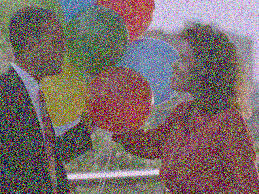

In [ ]:
# OpenCV: Load & display an image
img_cv = cv2.imread(image_address)  # Read image
cv2_imshow(img_cv)  # Show image

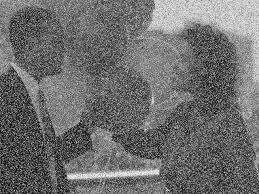

In [ ]:
# Convert the image to grayscale first
gray_image = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

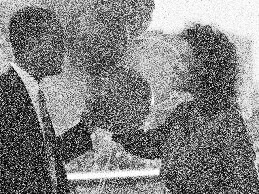

In [ ]:
# Apply Histogram Equalization
hist_eq = cv2.equalizeHist(gray_image)

# Display the image using cv2_imshow
cv2_imshow(hist_eq)

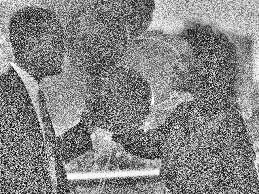

In [ ]:
# Apply CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray_image)

# Display the image using cv2_imshow
cv2_imshow(clahe_img)


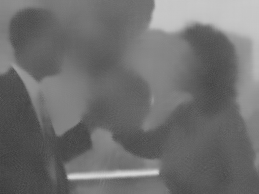

In [ ]:
# Apply Non-Local Means Denoising
denoised = cv2.fastNlMeansDenoising(gray_image, None, 30, 7, 19)

# Display the image using cv2_imshow
cv2_imshow(denoised)

In [ ]:
# Function to download an image from a given public URL (like one from Google Drive's sharing link)
# and return it as a PIL Image object.

def read_image_from_google_drive(url):
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Raise an exception for bad status codes

        image = Image.open(BytesIO(response.content))
        return image

    except requests.exceptions.RequestException as e:
        print(f"Error downloading image: {e}")
        return None

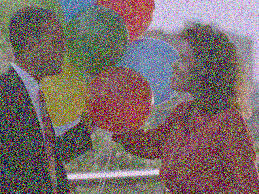

In [ ]:
# Lenna with salt pepper noise
image_url = "https://drive.usercontent.google.com/u/0/uc?id=1AaFhSPfh4TUR1EiAInNCu5nOoZ0DAO_9&export=download"

image = read_image_from_google_drive(image_url)

# Convert PIL Image to OpenCV format
image_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Display the image using cv2_imshow
cv2_imshow(image_cv2)

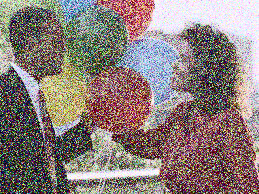

In [ ]:
# Convert to YCrCb color space
img_y_cr_cb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2YCrCb)

# Split the channels
y, cr, cb = cv2.split(img_y_cr_cb)

# Equalize the histogram on the Y (luminance) channel
y_eq = cv2.equalizeHist(y)

# Merge back the equalized Y with Cr and Cb
img_y_cr_cb_eq = cv2.merge((y_eq, cr, cb))

# Convert back to BGR color space
img_color_eq = cv2.cvtColor(img_y_cr_cb_eq, cv2.COLOR_YCrCb2BGR)

# Show the enhanced color image
cv2_imshow(img_color_eq)

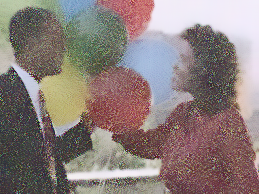

In [ ]:
# Apply Non-Local Means Denoising
denoised = cv2.fastNlMeansDenoising(img_color_eq, None, 39, 5, 21)

# Display the image using cv2_imshow
cv2_imshow(denoised)

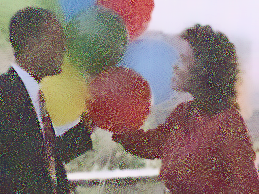

In [ ]:
# Convert the image to HSV color space
hsv = cv2.cvtColor(denoised, cv2.COLOR_BGR2HSV)

# Split the channels
h, s, v = cv2.split(hsv)

# Increase saturation by a multiplier (clipped to 255)
s = np.clip(s * 1.3, 0, 255).astype(np.uint8)  # 1.0 = original, >1.0 = more saturated

# Merge back and convert to BGR
hsv_boosted = cv2.merge((h, s, v))
saturation_boosted_img = cv2.cvtColor(hsv_boosted, cv2.COLOR_HSV2BGR)

# Show the final image
cv2_imshow(saturation_boosted_img)

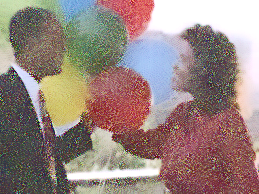

In [ ]:
# Increase contrast after denoising
alpha = 1.1  # Contrast control (1.0–3.0)
beta = 2     # Brightness control (0–100)

contrast_img = cv2.convertScaleAbs(saturation_boosted_img, alpha=alpha, beta=beta)

# Show final image
cv2_imshow(contrast_img)

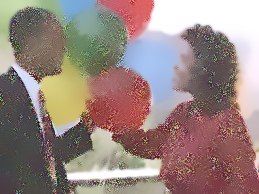

In [ ]:
# Apply Non-Local Means Denoising
denoised2 = cv2.fastNlMeansDenoising(contrast_img, None, 15, 4, 17)

# Display the image using cv2_imshow
cv2_imshow(denoised2)

In [ ]:
cv2.imwrite("processed_image_lastra.jpg", denoised2)
from google.colab import files
files.download("processed_image_lastra.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>